# Business Analytics Practicum I

### Loukopoulos Orestis | f2822104 | Full-Time 2021 - 2022

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

# 1st Dataset Kaggle
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

In [2]:
spot1 = pd.read_csv('SpotifyFeatures.csv')

In [3]:
spot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
spot1 = spot1.loc[:,['track_id','acousticness','danceability', 
                     'duration_ms', 'energy', 'instrumentalness', 'key', 
                     'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
                     'valence']]
spot1

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,6EFsue2YbIG4Qkq8Zr9Rir,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [5]:
#find the nuber unique track_ids
len(spot1.track_id.unique()) 

176774

### We will drop duplicate track_ids

In [6]:
spot1 = spot1.drop_duplicates(subset = ["track_id"])
spot1

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


### Now we can observe that there are no duplicate `track_id`.

In [7]:
spot1.track_id.value_counts()

146Fn1qFwkvq9GXuJkO4o4    1
0pl00cQghcUA7fnauVafij    1
2kcbSjvCyeryZVfgvdt4FQ    1
5LWJT1YD9g85kAmeWg9GyM    1
6ZoY4JuMpnTkQTLE8tYP5k    1
                         ..
3Z469RvXlYPsKV5iCPxgt9    1
7fcfFtyBmxcR4nLUGN8nxU    1
3At9CuVW91bBZs9KBhbYfD    1
1U6KEQuL5wPJZMR0iHvzqh    1
269dtHqJpomc3hzRMJzSbd    1
Name: track_id, Length: 176774, dtype: int64

In [8]:
#Check for NAs
spot1.isna().sum()

track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Checking the range of each column.

In [9]:
spot1.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127395,117.203679,0.451595
std,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395551,0.204345,31.325091,0.267820
min,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,0.440000
75%,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,0.667000
max,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [10]:
spot1.key.unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

* #### We will change the values in `key` column as according to spotify's documentation:  Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [11]:
spot1['key'].loc[spot1['key'] == 'C'] = 0
spot1['key'].loc[spot1['key'] == 'C#'] = 1
spot1['key'].loc[spot1['key'] == 'D'] = 2
spot1['key'].loc[spot1['key'] == 'D#'] = 3
spot1['key'].loc[spot1['key'] == 'E'] = 4
spot1['key'].loc[spot1['key'] == 'F'] = 5
spot1['key'].loc[spot1['key'] == 'F#'] = 6
spot1['key'].loc[spot1['key'] == 'G'] = 7
spot1['key'].loc[spot1['key'] == 'G#'] = 8
spot1['key'].loc[spot1['key'] == 'A'] = 9
spot1['key'].loc[spot1['key'] == 'A#'] = 10
spot1['key'].loc[spot1['key'] == 'B'] = 11
spot1.key.unique()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([1, 6, 0, 5, 7, 4, 3, 8, 2, 10, 9, 11], dtype=object)

In [12]:
spot1['mode'].unique()

array(['Major', 'Minor'], dtype=object)

* #### We will change the values in `mode` column, as according to spotify's documentation major is represented by 1 and minor by 0.

In [13]:
spot1['mode'].loc[spot1['mode'] == 'Major'] = 1
spot1['mode'].loc[spot1['mode'] == 'Minor'] = 0

In [14]:
spot1.time_signature.unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

* #### According to spotify's documentation,the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". So, we will remove any observations with values outside of this range {3,4,5,6,7}.

In [15]:
spot1['time_signature'].loc[spot1['time_signature'] == '0/4'] = None
spot1['time_signature'].loc[spot1['time_signature'] == '1/4'] = None
spot1['time_signature'].loc[spot1['time_signature'] == '3/4'] = 3
spot1['time_signature'].loc[spot1['time_signature'] == '4/4'] = 4
spot1['time_signature'].loc[spot1['time_signature'] == '5/4'] = 5
spot1.time_signature.unique()

array([4, 5, 3, None], dtype=object)

In [16]:
spot1.isna().sum()

track_id               0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo                  0
time_signature      2351
valence                0
dtype: int64

* We will drop the NAs.

In [17]:
spot1 = spot1.dropna()
spot1

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,10,0.2030,-4.345,0,0.1000,99.991,4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,2,0.1050,-9.014,1,0.2130,175.666,4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,10,0.2760,-13.092,0,0.0436,80.023,4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,4,0.2370,-6.944,0,0.0337,113.830,4,0.969


In [18]:
spot1.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,174423.000000,174423.000000,1.744230e+05,174423.000000,174423.000000,174423.000000,174423.000000,174423.000000,174423.000000,174423.000000
mean,0.399550,0.542853,2.365892e+05,0.559505,0.170750,0.223279,-10.061703,0.125418,117.349387,0.453519
std,0.365013,0.189835,1.300593e+05,0.274776,0.321791,0.209384,6.340153,0.200592,31.323434,0.267577
min,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,0.044300,0.417000,1.789330e+05,0.349000,0.000000,0.097400,-12.725500,0.036800,92.047000,0.224000
50%,0.280000,0.560000,2.197200e+05,0.595000,0.000069,0.130000,-8.136000,0.049400,115.064000,0.443000
75%,0.783000,0.684000,2.687070e+05,0.790000,0.086800,0.276000,-5.608000,0.101000,139.001000,0.669000
max,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# 2nd Dataset Kaggle

https://www.kaggle.com/saurabhshahane/spotgen-music-dataset

In [19]:
spot2 = pd.read_csv('spotify_tracks.csv')

In [20]:
spot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

In [21]:
spot2 = spot2.loc[:,['id','acousticness','danceability', 
                     'duration_ms', 'energy', 'instrumentalness', 'key', 
                     'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
                     'valence']]
spot2

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


We will rename the column `id` to `track_id` in order to match the column name of the 1st dataframe we defined (`spot1`).

In [22]:
spot2.rename(columns={'id': 'track_id'}, inplace=True)
spot2

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


In [23]:
# find the number of unique track_ids
len(spot2.track_id.unique())

101939

### We will do the same procedure for this dataset's unique `track_id`.

In [24]:
spot2 = spot2.drop_duplicates(subset = ["track_id"])
spot2

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


In [25]:
spot2.track_id.value_counts()

0hcmV7Lmiqpnix2wbKdCSJ    1
2ApOCDZtV7ZaBH31qCdqTg    1
01NRErhQZIau5ebhdXMhGs    1
73i8HclsPcSmyXwwLmVTFp    1
77oSD97FQ1FDYOhvHPii8I    1
                         ..
1DzQBIxTpAJm7SN5YwSyMH    1
4g6cBAfk6Weh7yOpjHs1e9    1
4AB2iR5C0nFa7o4zWM92OY    1
0CISIgQvsWwhUsfTwYNVYK    1
04evy4QQAnYPMnIPmMDq72    1
Name: track_id, Length: 101939, dtype: int64

In [26]:
#Check for NAs
spot2.isna().sum()

track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

* #### Checking the range of each column

In [27]:
round(spot2.describe(),3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000,101939.000
mean,0.352,0.586,246770.803,0.586,0.149,5.271,0.198,-9.463,0.618,0.129,118.359,3.876,0.483
std,0.335,0.178,190430.295,0.260,0.304,3.578,0.175,6.199,0.486,0.203,30.224,0.517,0.262
min,0.000,0.000,1155.000,0.000,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000,0.000
25%,0.041,0.480,184000.000,0.411,0.000,2.000,0.096,-11.149,0.000,0.036,95.973,4.000,0.271
50%,0.238,0.610,216893.000,0.629,0.000,5.000,0.124,-7.599,1.000,0.051,118.067,4.000,0.477
75%,0.645,0.714,261055.000,0.798,0.034,8.000,0.241,-5.509,1.000,0.104,136.045,4.000,0.693
max,0.996,0.989,5505831.000,1.000,1.000,11.000,0.999,2.719,1.000,0.969,244.035,5.000,0.993


In [28]:
spot2.time_signature.unique()

array([4., 3., 5., 1., 0.])

* ####  According to spotify's documentation, the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". So, we will remove any observations with values outside of this range {3,4,5,6,7}.

In [29]:
spot2['time_signature'].loc[spot2['time_signature'] == 0] = None
spot2['time_signature'].loc[spot2['time_signature'] == 1] = None

spot2.time_signature.unique()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([ 4.,  3.,  5., nan])

In [30]:
spot2.isna().sum()

track_id               0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo                  0
time_signature      1542
valence                0
dtype: int64

* We will drop the NAs.

In [31]:
spot2 = spot2.dropna()
spot2

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


In [32]:
spot2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100397.000000,100397.000000,1.003970e+05,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000,100397.000000
mean,0.348342,0.589386,2.476320e+05,0.590251,0.147292,5.276313,0.197058,-9.330838,0.617738,0.126928,118.906400,3.923474,0.486056
std,0.333391,0.173787,1.898038e+05,0.257964,0.302404,3.575950,0.174443,5.988431,0.485943,0.199586,29.392378,0.342674,0.260169
min,0.000000,0.051300,1.508000e+04,0.000020,0.000000,0.000000,0.011500,-60.000000,0.000000,0.021600,31.503000,3.000000,0.000000
25%,0.039700,0.483000,1.846670e+05,0.418000,0.000000,2.000000,0.095500,-11.009000,0.000000,0.036400,96.066000,4.000000,0.275000
50%,0.232000,0.612000,2.172530e+05,0.632000,0.000038,5.000000,0.124000,-7.550000,1.000000,0.050700,118.665000,4.000000,0.481000
75%,0.637000,0.716000,2.613370e+05,0.799000,0.033000,8.000000,0.240000,-5.487000,1.000000,0.103000,136.153000,4.000000,0.696000
max,0.996000,0.989000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,0.969000,244.035000,5.000000,0.993000


## 3rd Dataset Kaggle
https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs

In [33]:
spot3 = pd.read_csv('tracks_features.csv')

In [34]:
spot3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [35]:
spot3 = spot3.loc[:,['id','acousticness','danceability', 
                     'duration_ms', 'energy', 'instrumentalness', 'key', 
                     'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
                     'valence']]
spot3

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7lmeHLHBe4nmXzuXc0HDjk,0.02610,0.470,210133,0.978,0.000011,7,0.3560,-5.399,1,0.0727,117.906,4.0,0.503
1,1wsRitfRRtWyEapl0q22o8,0.01290,0.599,206200,0.957,0.000071,11,0.1550,-5.764,1,0.1880,103.680,4.0,0.489
2,1hR0fIFK2qRG3f3RF70pb7,0.02340,0.315,298893,0.970,0.000002,7,0.1220,-5.424,1,0.4830,149.749,4.0,0.370
3,2lbASgTSoDO7MTuLAXlTW0,0.16300,0.440,213640,0.967,0.000004,11,0.1210,-5.830,0,0.2370,96.752,4.0,0.574
4,1MQTmpYOZ6fcMQc56Hdo7T,0.00162,0.426,205600,0.929,0.105000,2,0.0789,-6.729,1,0.0701,127.059,4.0,0.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213,0.966,0.002240,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179,0.701,0.644000,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335,0.796,0.918000,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455,0.856,0.776000,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


In [36]:
spot3.rename(columns={'id': 'track_id'}, inplace=True)
spot3

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7lmeHLHBe4nmXzuXc0HDjk,0.02610,0.470,210133,0.978,0.000011,7,0.3560,-5.399,1,0.0727,117.906,4.0,0.503
1,1wsRitfRRtWyEapl0q22o8,0.01290,0.599,206200,0.957,0.000071,11,0.1550,-5.764,1,0.1880,103.680,4.0,0.489
2,1hR0fIFK2qRG3f3RF70pb7,0.02340,0.315,298893,0.970,0.000002,7,0.1220,-5.424,1,0.4830,149.749,4.0,0.370
3,2lbASgTSoDO7MTuLAXlTW0,0.16300,0.440,213640,0.967,0.000004,11,0.1210,-5.830,0,0.2370,96.752,4.0,0.574
4,1MQTmpYOZ6fcMQc56Hdo7T,0.00162,0.426,205600,0.929,0.105000,2,0.0789,-6.729,1,0.0701,127.059,4.0,0.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213,0.966,0.002240,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179,0.701,0.644000,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335,0.796,0.918000,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455,0.856,0.776000,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


In [37]:
# find the number of unique track_ids
len(spot3.track_id.unique())

1204025

* So in this dataset we do not have the problem of duplicate songs

In [38]:
spot3.track_id.value_counts()

6QkDzhWBR4gc1cqadn5Eh1    1
3sFvujF2lFX8YE9IB7n2ge    1
2GjDck78Ss5UYNuFZu9Z14    1
31NyQ3Cw3PKoWvlpWKnwm7    1
6ZStNEjhId3gUuP3jPDOKk    1
                         ..
6IBNOFFuDsCrsSDwCYKuUB    1
7kN2zjJV2INZB9H5WmGS5w    1
2JJQYUp7A9pepp4QQeWe9N    1
7eXZQhSdFU7oFbRfSm7sey    1
1WIK1iSmDKLelHHIkCyxIv    1
Name: track_id, Length: 1204025, dtype: int64

In [39]:
#Check for NAs
spot3.isna().sum()

track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

* #### Checking the range of each column

In [40]:
round(spot3.describe(), 3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000,1204025.000
mean,0.447,0.493,248839.861,0.510,0.283,5.194,0.202,-11.809,0.671,0.084,117.634,3.832,0.428
std,0.385,0.190,162210.357,0.295,0.376,3.537,0.180,6.982,0.470,0.116,30.937,0.561,0.270
min,0.000,0.000,1000.000,0.000,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000,0.000
25%,0.038,0.356,174090.000,0.252,0.000,2.000,0.097,-15.254,0.000,0.035,94.054,4.000,0.191
50%,0.389,0.501,224339.000,0.524,0.008,5.000,0.125,-9.791,1.000,0.045,116.726,4.000,0.403
75%,0.861,0.633,285840.000,0.766,0.719,8.000,0.245,-6.717,1.000,0.072,137.046,4.000,0.644
max,0.996,1.000,6061090.000,1.000,1.000,11.000,1.000,7.234,1.000,0.969,248.934,5.000,1.000


In [41]:
spot3.time_signature.unique()

array([4., 3., 5., 1., 0.])

* #### According to spotify's documentation,the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". So, we will remove any observations with values outside of this range {3,4,5,6,7}.

In [42]:
spot3['time_signature'].loc[spot3['time_signature'] == 0] = None
spot3['time_signature'].loc[spot3['time_signature'] == 1] = None

spot3.time_signature.unique()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([ 4.,  3.,  5., nan])

* We will drop the NAs.

In [43]:
spot3 = spot3.dropna()
spot3

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7lmeHLHBe4nmXzuXc0HDjk,0.02610,0.470,210133,0.978,0.000011,7,0.3560,-5.399,1,0.0727,117.906,4.0,0.503
1,1wsRitfRRtWyEapl0q22o8,0.01290,0.599,206200,0.957,0.000071,11,0.1550,-5.764,1,0.1880,103.680,4.0,0.489
2,1hR0fIFK2qRG3f3RF70pb7,0.02340,0.315,298893,0.970,0.000002,7,0.1220,-5.424,1,0.4830,149.749,4.0,0.370
3,2lbASgTSoDO7MTuLAXlTW0,0.16300,0.440,213640,0.967,0.000004,11,0.1210,-5.830,0,0.2370,96.752,4.0,0.574
4,1MQTmpYOZ6fcMQc56Hdo7T,0.00162,0.426,205600,0.929,0.105000,2,0.0789,-6.729,1,0.0701,127.059,4.0,0.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213,0.966,0.002240,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179,0.701,0.644000,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335,0.796,0.918000,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455,0.856,0.776000,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


In [44]:
round(spot3.describe(), 3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000,1181785.000
mean,0.442,0.496,250039.389,0.513,0.281,5.196,0.202,-11.698,0.672,0.084,118.046,3.888,0.431
std,0.384,0.188,161946.543,0.294,0.375,3.536,0.180,6.877,0.470,0.115,30.445,0.388,0.270
min,0.000,0.000,15000.000,0.000,0.000,0.000,0.000,-58.925,0.000,0.000,30.018,3.000,0.000
25%,0.036,0.360,175347.000,0.258,0.000,2.000,0.097,-15.053,0.000,0.035,94.508,4.000,0.195
50%,0.378,0.503,225013.000,0.528,0.008,5.000,0.125,-9.711,1.000,0.045,117.017,4.000,0.407
75%,0.855,0.635,286300.000,0.769,0.713,8.000,0.245,-6.685,1.000,0.072,137.274,4.000,0.647
max,0.996,1.000,6061090.000,1.000,1.000,11.000,1.000,7.234,1.000,0.969,248.934,5.000,1.000


# Merge the datasets
* In this section we will merge the three dataframes we defined above (`spot1`, `spot2` & `spot3`).

In [45]:
spotmix = pd.concat([spot1, spot2, spot3])

In [46]:
spotmix

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373.0,0.910,0.00000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373.0,0.737,0.00000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267.0,0.131,0.00000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427.0,0.326,0.00000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625.0,0.225,0.12300,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213.0,0.966,0.00224,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179.0,0.701,0.64400,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335.0,0.796,0.91800,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455.0,0.856,0.77600,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


* We will drop the `track_id`s that appear more than one time in our merged dataset.

In [47]:
spotmix = spotmix.drop_duplicates(subset = ["track_id"])
spotmix

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373.0,0.910,0.00000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373.0,0.737,0.00000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267.0,0.131,0.00000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427.0,0.326,0.00000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625.0,0.225,0.12300,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213.0,0.966,0.00224,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179.0,0.701,0.64400,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335.0,0.796,0.91800,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455.0,0.856,0.77600,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


* #### Checking the range of each column

In [48]:
round(spotmix.describe(),3)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000,1414259.000
mean,0.433,0.507,248434.511,0.523,0.262,0.204,-11.398,0.092,118.002,0.437
std,0.380,0.189,161921.372,0.291,0.369,0.184,6.811,0.136,30.482,0.270
min,0.000,0.000,15000.000,0.000,0.000,0.000,-60.000,0.000,30.018,0.000
25%,0.038,0.371,176190.500,0.274,0.000,0.097,-14.595,0.035,94.269,0.202
50%,0.355,0.516,223573.000,0.543,0.003,0.126,-9.404,0.045,116.982,0.416
75%,0.840,0.647,282747.000,0.775,0.652,0.249,-6.469,0.077,137.382,0.653
max,0.996,1.000,6061090.000,1.000,1.000,1.000,7.234,0.969,248.934,1.000


# Test Dataset

* First we will load the song ids to a new data frame.

In [49]:
data = pd.read_csv("spotify_ids.txt", sep=" ", header=None)
data.columns = ["song_id"]
data

,song_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


* Then we will insert our Spotify client credentials.

In [50]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(
    client_id = 'a63e28fef6f34e6fbb98c103cae20032',
    client_secret ='ab710d809c294f1e8c10183a5ba06891'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

* We will create a dictionary which will have the song_ids as keys and the audio features for each track as values.

In [51]:
features = {}
all_track_ids = list(data['song_id'].unique())

In [52]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [53]:
len(features) == len(all_track_ids) # with this command we can verify that we have all the songs.

True

In [54]:
features['7lPN2DXiMsVn7XUKtOW1CS']

{'danceability': 0.585,
 'energy': 0.436,
 'key': 10,
 'loudness': -8.761,
 'mode': 1,
 'speechiness': 0.0601,
 'acousticness': 0.721,
 'instrumentalness': 1.31e-05,
 'liveness': 0.105,
 'valence': 0.132,
 'tempo': 143.874,
 'type': 'audio_features',
 'id': '7lPN2DXiMsVn7XUKtOW1CS',
 'uri': 'spotify:track:7lPN2DXiMsVn7XUKtOW1CS',
 'track_href': 'https://api.spotify.com/v1/tracks/7lPN2DXiMsVn7XUKtOW1CS',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7lPN2DXiMsVn7XUKtOW1CS',
 'duration_ms': 242014,
 'time_signature': 4}

* We will turn the dictionary to a dataframe called `tracks`.

In [55]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


* ### We will now, go back in the `spotmix` data set, in order to search if there are any `track_id`s included from the test dataset.

In [56]:
spotmix

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373.0,0.910,0.00000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373.0,0.737,0.00000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267.0,0.131,0.00000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427.0,0.326,0.00000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625.0,0.225,0.12300,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213.0,0.966,0.00224,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179.0,0.701,0.64400,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335.0,0.796,0.91800,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455.0,0.856,0.77600,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


In [57]:
# Convert index to column
tracks.reset_index(inplace=True)
tracks = tracks.rename(columns = {'index':'track_id'})

*  We will find the `track_id`s that are in both `spotmix` (train) and `tracks` (test) dataset, in order to remove them from the train dataset.



In [58]:
remove = spotmix.merge(tracks, how = 'inner', on = 'track_id' )

In [59]:
remove = remove.track_id
remove

0      2QjOHCTQ1Jl3zawyYOpxh6
1      60a0Rd6pjrkxjPbaKzXjfq
2      5E30LdtzQTGqRvNd7l6kG5
3      37y7iDayfwm3WXn5BiAoRk
4      2VxeLyX666F8uXCJ0dZF8B
                ...          
160    5RubKOuDoPn5Kj5TLVxSxY
161    2XIc1pqjXV3Cr2BQUGNBck
162    26QApq0cuO9brJigr0C0W4
163    26w9NTiE9NGjW1ZvIOd1So
164    4MzXwWMhyBbmu6hOcLVD49
Name: track_id, Length: 165, dtype: object

In [60]:
# Replacing the track_ids in the train dataset that exist in the test dataset as well, with NA.
for i in range(len(remove)):
    spotmix.track_id.loc[spotmix.track_id == remove[i]] = None

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
spotmix.isna().sum()

track_id            165
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
dtype: int64

* So, we can see that there are 165 songs on both `spotmix` (train) and `tracks` (test) datasets. Hence, we have to remove them from the training dataset. 

In [62]:
#Removing the unwanted rows
spotmix = spotmix.dropna()
spotmix

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373.0,0.910,0.00000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373.0,0.737,0.00000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267.0,0.131,0.00000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427.0,0.326,0.00000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625.0,0.225,0.12300,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.00935,0.264,276213.0,0.966,0.00224,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.10400,0.796,363179.0,0.701,0.64400,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,6iProIgUe3ETpO6UT0v5Hg,0.03040,0.785,385335.0,0.796,0.91800,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,37B4SXC8uoBsUyKCWnhPfX,0.00007,0.665,324455.0,0.856,0.77600,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


In [63]:
spotmix.isna().sum()

track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

* ### Now we will go back to the Test Dataset `tracks`.

We will drop the columns that do not offer any vital information to our analysis. These columns are the following:
* `track_id`
* `type`
* `id`
* `uri`
* `track_href`
* `analysis_url`

In [64]:
tracks = tracks.drop(['track_id','type','id','uri','track_href','analysis_url'],axis=1)
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,4


In [65]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,0.661102,0.627592,5.250430,-6.443399,0.611015,0.106303,0.264749,0.012910,0.177630,0.511871,121.696013,201982.033563,3.956110
std,0.148711,0.173714,3.584362,2.555804,0.487730,0.099083,0.266279,0.080560,0.142206,0.233381,30.092805,54373.184378,0.330429
min,0.150000,0.047400,0.000000,-22.507000,0.000000,0.023200,0.000025,0.000000,0.026000,0.032000,46.718000,52062.000000,1.000000
25%,0.574000,0.524000,2.000000,-7.612750,0.000000,0.040600,0.046600,0.000000,0.094125,0.331000,96.978000,168022.500000,4.000000
50%,0.675000,0.647000,5.000000,-6.107000,1.000000,0.062250,0.170000,0.000000,0.123000,0.511000,120.018500,195979.000000,4.000000
75%,0.773000,0.749750,8.000000,-4.665750,1.000000,0.128750,0.414000,0.000032,0.217750,0.691000,141.981000,226101.750000,4.000000
max,0.980000,0.989000,11.000000,-0.515000,1.000000,0.564000,0.994000,0.927000,0.977000,0.978000,208.918000,690732.000000,5.000000


* #### According to spotify's documentation, the time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". So, we will remove any observations with values outside of this range {3,4,5,6,7}.

In [66]:
tracks['time_signature'].loc[tracks['time_signature'] == 1] = None

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
tracks = tracks.dropna()
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4.0
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4.0
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4.0
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4.0
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,4.0
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,4.0
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,4.0
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,4.0


In [68]:
#Rearranging the columns in order to match the spotmix dataset
tracks = tracks[['acousticness','danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.72100,0.585,242014,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,4.0,0.132
1,0.02120,0.680,215627,0.826,0.000012,0,0.5430,-5.487,1,0.0309,118.051,4.0,0.644
2,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4.0,0.334
3,0.40100,0.731,205090,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,4.0,0.145
4,0.45100,0.907,205458,0.393,0.000001,4,0.1350,-7.636,0,0.0539,104.949,4.0,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.13800,0.596,257428,0.650,0.000000,9,0.1400,-5.167,1,0.3370,133.997,4.0,0.188
1158,0.16800,0.588,187310,0.850,0.002020,4,0.0465,-6.431,1,0.0318,93.003,4.0,0.768
1159,0.17900,0.754,209299,0.660,0.000000,0,0.1940,-6.811,1,0.2670,83.000,4.0,0.316
1160,0.05580,0.584,202204,0.836,0.000000,0,0.0663,-4.925,1,0.0790,104.973,4.0,0.484


In [69]:
#Create Dummies
tracks = pd.get_dummies(tracks, columns=['key'],drop_first=True)
tracks = pd.get_dummies(tracks, columns=['mode'],drop_first=True)
tracks = pd.get_dummies(tracks, columns=['time_signature'],drop_first=True)
tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4.0,time_signature_5.0
0,0.72100,0.585,242014,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,...,0,0,0,0,0,1,0,1,1,0
1,0.02120,0.680,215627,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,...,0,0,0,0,0,0,0,1,1,0
2,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,...,0,0,0,0,0,0,0,1,1,0
3,0.40100,0.731,205090,0.573,0.000052,0.1130,-10.059,0.0544,109.928,0.145,...,0,0,0,0,0,0,0,0,1,0
4,0.45100,0.907,205458,0.393,0.000001,0.1350,-7.636,0.0539,104.949,0.202,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.13800,0.596,257428,0.650,0.000000,0.1400,-5.167,0.3370,133.997,0.188,...,0,0,0,0,1,0,0,1,1,0
1158,0.16800,0.588,187310,0.850,0.002020,0.0465,-6.431,0.0318,93.003,0.768,...,0,0,0,0,0,0,0,1,1,0
1159,0.17900,0.754,209299,0.660,0.000000,0.1940,-6.811,0.2670,83.000,0.316,...,0,0,0,0,0,0,0,1,1,0
1160,0.05580,0.584,202204,0.836,0.000000,0.0663,-4.925,0.0790,104.973,0.484,...,0,0,0,0,0,0,0,1,1,0


In [70]:
#We will put valence column in the last place
last4 = tracks.pop('valence')
tracks['valence'] = last4
tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4.0,time_signature_5.0,valence
0,0.72100,0.585,242014,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0,...,0,0,0,0,1,0,1,1,0,0.132
1,0.02120,0.680,215627,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0,...,0,0,0,0,0,0,1,1,0,0.644
2,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,1,...,0,0,0,0,0,0,1,1,0,0.334
3,0.40100,0.731,205090,0.573,0.000052,0.1130,-10.059,0.0544,109.928,0,...,0,0,0,0,0,0,0,1,0,0.145
4,0.45100,0.907,205458,0.393,0.000001,0.1350,-7.636,0.0539,104.949,0,...,0,0,0,0,0,0,0,1,0,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.13800,0.596,257428,0.650,0.000000,0.1400,-5.167,0.3370,133.997,0,...,0,0,0,1,0,0,1,1,0,0.188
1158,0.16800,0.588,187310,0.850,0.002020,0.0465,-6.431,0.0318,93.003,0,...,0,0,0,0,0,0,1,1,0,0.768
1159,0.17900,0.754,209299,0.660,0.000000,0.1940,-6.811,0.2670,83.000,0,...,0,0,0,0,0,0,1,1,0,0.316
1160,0.05580,0.584,202204,0.836,0.000000,0.0663,-4.925,0.0790,104.973,0,...,0,0,0,0,0,0,1,1,0,0.484


# Question 1: Expore which Track Features Influence Valence

We will remove the column `track_id` as it contains useless informations for the inferential model we have to create.

In [71]:
spotmix = spotmix.iloc[:,1:14]

spotmix

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.61100,0.389,99373.0,0.910,0.00000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0.24600,0.590,137373.0,0.737,0.00000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0.95200,0.663,170267.0,0.131,0.00000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0.70300,0.240,152427.0,0.326,0.00000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0.95000,0.331,82625.0,0.225,0.12300,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.966,0.00224,5,0.3370,-6.970,0,0.0672,159.586,4.0,0.415
1204021,0.10400,0.796,363179.0,0.701,0.64400,11,0.0749,-6.602,0,0.0883,121.980,4.0,0.781
1204022,0.03040,0.785,385335.0,0.796,0.91800,9,0.0664,-5.960,0,0.0564,121.996,4.0,0.467
1204023,0.00007,0.665,324455.0,0.856,0.77600,6,0.1170,-6.788,0,0.0409,124.986,4.0,0.227


## Descriptive Analysis

In the first part we will execute some bivariate analysis between our response variable `valence` and our categorical predictors:
* `key`
* `mode`
* `time_signature`

<AxesSubplot:xlabel='key', ylabel='valence'>

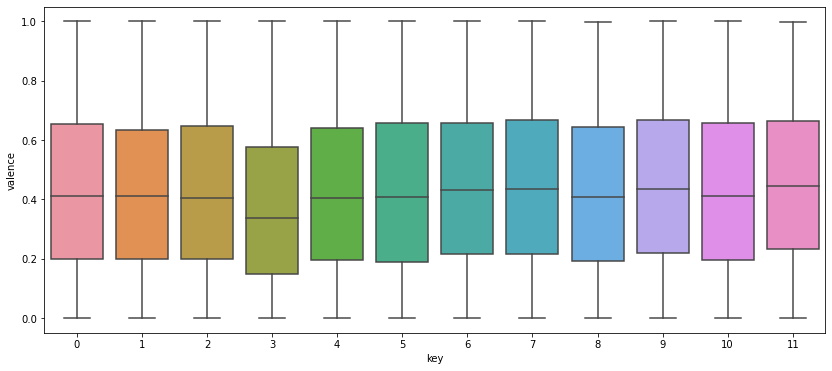

In [72]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='key', y='valence', data=spotmix)

* From the above graph we can observe that the value of `key` which leads to sadder songs is equal to 3 (e.g., 3: D#), with the rest keys falctuating in the same levels in terms of `valence` score.

<AxesSubplot:xlabel='mode', ylabel='valence'>

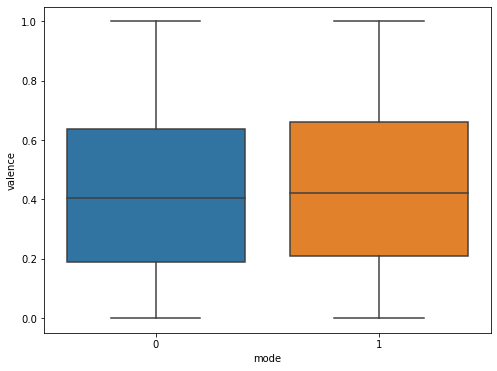

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='valence', data=spotmix)

* From the above boxplot we can see that the value of `mode` variable (e.g., 0: Minor, 1: Major) seems to not affect the `valence` score.

<AxesSubplot:xlabel='time_signature', ylabel='valence'>

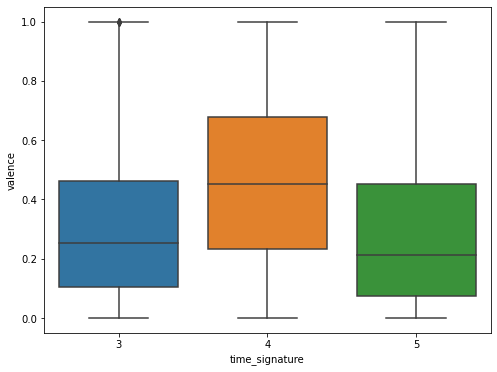

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_signature', y='valence', data=spotmix)

* From the above graph it appears that if `time_signature` is equal to 4.0, then it leads to an increase in `valence`. That means that the balance in `time_signature` (e.g., equal to 4.0) means happier songs.

* It this part we'll have to transform the above mentioned categorical variables (`key`, `mode` and `time_signature`) to sets of binary dummy variables.

In [75]:
spotmix = pd.get_dummies(spotmix, drop_first=True)
spotmix

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,0.61100,0.389,99373.0,0.910,0.00000,0.3460,-1.828,0.0525,166.969,0.814,...,0,0,0,0,0,0,0,1,1,0
1,0.24600,0.590,137373.0,0.737,0.00000,0.1510,-5.559,0.0868,174.003,0.816,...,0,1,0,0,0,0,0,0,1,0
2,0.95200,0.663,170267.0,0.131,0.00000,0.1030,-13.879,0.0362,99.488,0.368,...,0,0,0,0,0,0,0,0,0,1
3,0.70300,0.240,152427.0,0.326,0.00000,0.0985,-12.178,0.0395,171.758,0.227,...,0,0,0,0,0,0,0,1,1,0
4,0.95000,0.331,82625.0,0.225,0.12300,0.2020,-21.150,0.0456,140.576,0.390,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.966,0.00224,0.3370,-6.970,0.0672,159.586,0.415,...,1,0,0,0,0,0,0,0,1,0
1204021,0.10400,0.796,363179.0,0.701,0.64400,0.0749,-6.602,0.0883,121.980,0.781,...,0,0,0,0,0,0,1,0,1,0
1204022,0.03040,0.785,385335.0,0.796,0.91800,0.0664,-5.960,0.0564,121.996,0.467,...,0,0,0,0,1,0,0,0,1,0
1204023,0.00007,0.665,324455.0,0.856,0.77600,0.1170,-6.788,0.0409,124.986,0.227,...,0,1,0,0,0,0,0,0,1,0


* Continuing, we will execute some bivariate analysis between our response variable `valence` and the numeric variables of our dataset. 

In [76]:
#spotmix_num contains only the numeric variables of spotmix
spotmix_num = spotmix.select_dtypes(include = 'float64')
spotmix_num

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.61100,0.389,99373.0,0.910,0.00000,0.3460,-1.828,0.0525,166.969,0.814
1,0.24600,0.590,137373.0,0.737,0.00000,0.1510,-5.559,0.0868,174.003,0.816
2,0.95200,0.663,170267.0,0.131,0.00000,0.1030,-13.879,0.0362,99.488,0.368
3,0.70300,0.240,152427.0,0.326,0.00000,0.0985,-12.178,0.0395,171.758,0.227
4,0.95000,0.331,82625.0,0.225,0.12300,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.966,0.00224,0.3370,-6.970,0.0672,159.586,0.415
1204021,0.10400,0.796,363179.0,0.701,0.64400,0.0749,-6.602,0.0883,121.980,0.781
1204022,0.03040,0.785,385335.0,0.796,0.91800,0.0664,-5.960,0.0564,121.996,0.467
1204023,0.00007,0.665,324455.0,0.856,0.77600,0.1170,-6.788,0.0409,124.986,0.227


* We took only the numeric variables of our dataframe, in order to check the association between them.

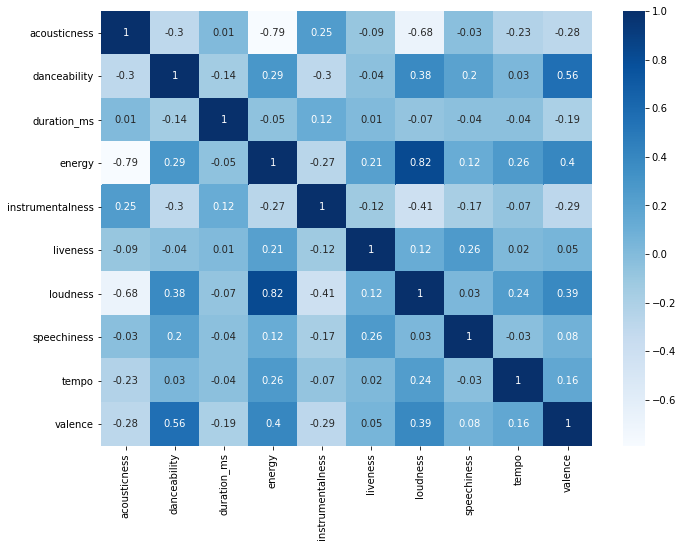

In [77]:
corr = round(spotmix_num.corr(),2)
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

* From the above graph, we can see that there is a strong positive linear correlation between `loudness` and `energy` with ρ = 0.82. We can also observe a strong negative linear correlation between `acousticness` and `energy` with ρ = -0.79. The above results indicate the problem of multicolinearity. We will see how we will tackle this problem further on our analysis.

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(spotmix.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               107.331021
acousticness          2.861459
danceability          1.811192
duration_ms           1.049770
energy                5.393134
instrumentalness      1.350393
liveness              1.161411
loudness              3.829977
speechiness           1.234726
tempo                 1.101703
valence               1.753139
key_1                 1.561185
key_2                 1.726856
key_3                 1.232139
key_4                 1.555957
key_5                 1.550169
key_6                 1.393994
key_7                 1.774540
key_8                 1.376931
key_9                 1.702389
key_10                1.447626
key_11                1.506122
mode_1                1.089803
time_signature_4      1.162445
dtype: float64

* We can see that the VIF value for variable `energy` is quite high, which indicates that we have to remove this variable in order to tackle the problem of multicolinearity.

In [79]:
#removing variable energy
import copy

spotmix_q1 = copy.deepcopy(spotmix)
spotmix_q1 = spotmix_q1.drop(labels = 'energy', axis = 1)
spotmix_q1

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_1,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,0.61100,0.389,99373.0,0.00000,0.3460,-1.828,0.0525,166.969,0.814,1,...,0,0,0,0,0,0,0,1,1,0
1,0.24600,0.590,137373.0,0.00000,0.1510,-5.559,0.0868,174.003,0.816,0,...,0,1,0,0,0,0,0,0,1,0
2,0.95200,0.663,170267.0,0.00000,0.1030,-13.879,0.0362,99.488,0.368,0,...,0,0,0,0,0,0,0,0,0,1
3,0.70300,0.240,152427.0,0.00000,0.0985,-12.178,0.0395,171.758,0.227,1,...,0,0,0,0,0,0,0,1,1,0
4,0.95000,0.331,82625.0,0.12300,0.2020,-21.150,0.0456,140.576,0.390,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.00224,0.3370,-6.970,0.0672,159.586,0.415,0,...,1,0,0,0,0,0,0,0,1,0
1204021,0.10400,0.796,363179.0,0.64400,0.0749,-6.602,0.0883,121.980,0.781,0,...,0,0,0,0,0,0,1,0,1,0
1204022,0.03040,0.785,385335.0,0.91800,0.0664,-5.960,0.0564,121.996,0.467,0,...,0,0,0,0,1,0,0,0,1,0
1204023,0.00007,0.665,324455.0,0.77600,0.1170,-6.788,0.0409,124.986,0.227,0,...,0,1,0,0,0,0,0,0,1,0


In [80]:
all_columns = list(spotmix_q1.columns)
all_columns.remove('valence')
all_columns_formula = "valence ~ " + '+'.join(all_columns)
all_columns_formula

'valence ~ acousticness+danceability+duration_ms+instrumentalness+liveness+loudness+speechiness+tempo+key_1+key_2+key_3+key_4+key_5+key_6+key_7+key_8+key_9+key_10+key_11+mode_1+time_signature_4+time_signature_5'

* Defining the `fullmodel` which contains all the variables except from energy that we removed it.



In [81]:
fullmodel = smf.ols(formula=all_columns_formula, data=spotmix_q1)
fullmodel_res = fullmodel.fit()
fullmodel_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 3.993e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:55:50   Log-Likelihood:             1.8868e+05
No. Observations:             1414094   AIC:                        -3.773e+05
Df Residuals:                 1414071   BIC:                        -3.770e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0501      0.001     34.887      0.000       0.047       0.053
acousticness         0.0084      0.001     12.848      0.000       0.007       0.010
danceability         0.6741      0.001    613.707      0.000       0.672       0.676
duration_ms      -1.728e-07   1.12e-09   -154.521      0.000   -1.75e-07   -1.71e-07
instrumentalness    -0.0520      0.001    -94.842      0.000      -0.053      -0.051
liveness             0.0845      0.001     82.419      0.000       0.082       0.086
loudness             0.0054   3.92e-05    136.834      0.000       0.005       0.005
speechiness         -0.0743      0.001    -51.902      0.000      -0.077      -0.071
tempo                0.0009   6.08e-06    149.127      0.000       0.001       0.001
key_1               -0.0341      0.001    -42.311      0.000      -0.036      -0.033
key_2                0.0028      0.001      3.844      0.000       0.001       0.004
key_3               -0.0033      0.001     -2.945      0.003      -0.005      -0.001
key_4               -0.0013      0.001     -1.630      0.103      -0.003       0.000
key_5                0.0090      0.001     11.265      0.000       0.007       0.011
key_6               -0.0037      0.001     -4.006      0.000      -0.006      -0.002
key_7                0.0087      0.001     12.156      0.000       0.007       0.010
key_8               -0.0118      0.001    -13.006      0.000      -0.014      -0.010
key_9                0.0141      0.001     18.871      0.000       0.013       0.016
key_10               0.0017      0.001      1.988      0.047    2.41e-05       0.003
key_11              -0.0003      0.001     -0.359      0.719      -0.002       0.001
mode_1               0.0224      0.000     56.981      0.000       0.022       0.023
time_signature_4     0.0323      0.001     58.302      0.000       0.031       0.033
time_signature_5    -0.0064      0.001     -5.250      0.000      -0.009      -0.004
==============================================================================
Omnibus:                    12262.123   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10362.985
Skew:                           0.150   Prob(JB):                         0.00
Kurtosis:                       2.707   Cond. No.                     3.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [83]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [84]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

* The number of independent variables is large so, we will implement backward stepwise procedure. 

In [85]:
best_model, _ = backward_stepwise_selection(spotmix_q1, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 22 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 21 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 20 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 19 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 

* The best model that backward stepwise procedure is giving us is wrong, as it has removed some levels from the categorical variables `key` and `time_signature`. We will also execute forward stepwise procedure to check if we get a better model.

In [86]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [87]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [88]:
best_model, _ = forward_stepwise_selection(spotmix_q1, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'loudness']
Finding the best model for 3 variables
['danceability', 'loudness', 'duration_ms']
Finding the best model for 4 variables
['danceability', 'loudness', 'duration_ms', 'tempo']
Finding the best model for 5 variables
['danceability', 'loudness', 'duration_ms', 'tempo', 'instrumentalness']
Finding the best model for 6 variables
['danceability', 'loudness', 'duration_ms', 'tempo', 'instrumentalness', 'liveness']
Finding the best model for 7 variables
['danceability', 'loudness', 'duration_ms', 'tempo', 'instrumentalness', 'liveness', 'time_signature_4']
Finding the best model for 8 variables
['danceability', 'loudness', 'duration_ms', 'tempo', 'instrumentalness', 'liveness', 'time_signature_4', 'speechiness']
Finding the best model for 9 variables
['danceability', 'loudness', 'duration_ms', 'tempo', 'instrumentalness', 'liveness', 'time_signature_4', 'speechiness', 'mod

* Again, we face the same problem as with the backward stepwise where some levels from the categorical variables `key` and `time_signature` were removed. So, the inference will be done on the full model.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(spotmix_q1.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               63.731153
acousticness         1.934241
danceability         1.724534
duration_ms          1.049757
instrumentalness     1.301034
liveness             1.126455
loudness             2.279902
speechiness          1.185949
tempo                1.098929
valence              1.621129
key_1                1.559496
key_2                1.726477
key_3                1.232115
key_4                1.555526
key_5                1.550084
key_6                1.393204
key_7                1.774270
key_8                1.376161
key_9                1.701822
key_10               1.447346
key_11               1.505322
mode_1               1.088530
time_signature_4     1.153259
dtype: float64

* We can see that after removing `energy` variable we have not the multicolinearity problem, as the VIF values of each variable are quite low.

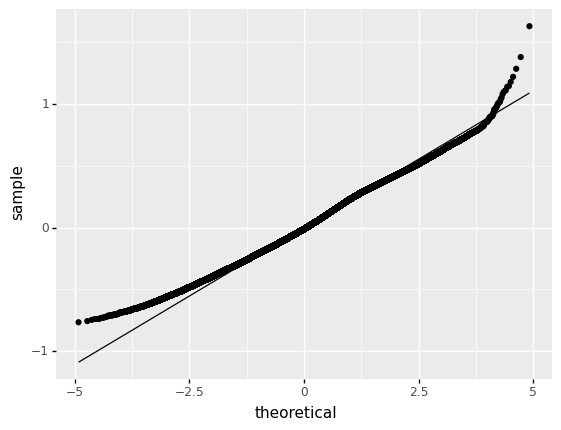

<ggplot: (8789362055412)>

In [90]:
#We will check the QQ-plot, to check the normality of residuals.

ggplot(data=fullmodel_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

* From the above plot we can see that the assumption of the normality of residuals is violated as the quantile points do not lie on the theoretical normal line.

* We will plot model's residuals against fitted values, in order to check the assumption of linearity and homoscedasticity.

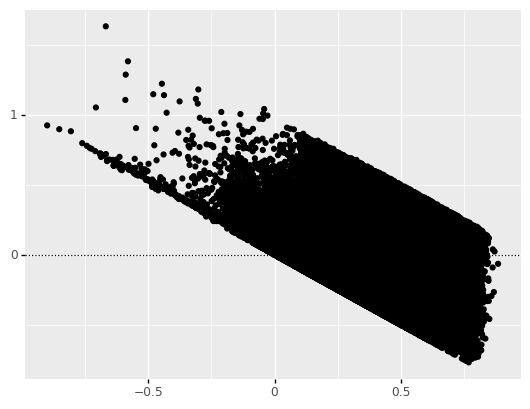

<ggplot: (8789348279345)>

In [91]:
# Plot model's Residuals against Fitted Values

ggplot(data=spotmix_q1) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=fullmodel_res.fittedvalues, y=fullmodel_res.resid))

* From the above graph we can see that the assumption of homoscedasticity is violated, as we can see an obvious trend in residuals VS fitted values. Ideally, we should see a shapeless cloud of dots without any indication of a trend which is not the case here.

* From the above plot, we can see that there is no evidence that the linearity assumption is violated.

In [92]:
fullmodel_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 3.993e+04
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:01:46   Log-Likelihood:             1.8868e+05
No. Observations:             1414094   AIC:                        -3.773e+05
Df Residuals:                 1414071   BIC:                        -3.770e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0501      0.001     34.887      0.000       0.047       0.053
acousticness         0.0084      0.001     12.848      0.000       0.007       0.010
danceability         0.6741      0.001    613.707      0.000       0.672       0.676
duration_ms      -1.728e-07   1.12e-09   -154.521      0.000   -1.75e-07   -1.71e-07
instrumentalness    -0.0520      0.001    -94.842      0.000      -0.053      -0.051
liveness             0.0845      0.001     82.419      0.000       0.082       0.086
loudness             0.0054   3.92e-05    136.834      0.000       0.005       0.005
speechiness         -0.0743      0.001    -51.902      0.000      -0.077      -0.071
tempo                0.0009   6.08e-06    149.127      0.000       0.001       0.001
key_1               -0.0341      0.001    -42.311      0.000      -0.036      -0.033
key_2                0.0028      0.001      3.844      0.000       0.001       0.004
key_3               -0.0033      0.001     -2.945      0.003      -0.005      -0.001
key_4               -0.0013      0.001     -1.630      0.103      -0.003       0.000
key_5                0.0090      0.001     11.265      0.000       0.007       0.011
key_6               -0.0037      0.001     -4.006      0.000      -0.006      -0.002
key_7                0.0087      0.001     12.156      0.000       0.007       0.010
key_8               -0.0118      0.001    -13.006      0.000      -0.014      -0.010
key_9                0.0141      0.001     18.871      0.000       0.013       0.016
key_10               0.0017      0.001      1.988      0.047    2.41e-05       0.003
key_11              -0.0003      0.001     -0.359      0.719      -0.002       0.001
mode_1               0.0224      0.000     56.981      0.000       0.022       0.023
time_signature_4     0.0323      0.001     58.302      0.000       0.031       0.033
time_signature_5    -0.0064      0.001     -5.250      0.000      -0.009      -0.004
==============================================================================
Omnibus:                    12262.123   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10362.985
Skew:                           0.150   Prob(JB):                         0.00
Kurtosis:                       2.707   Cond. No.                     3.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* All of our variables are statistically significant in level of significance 5%, except of some levels of `key` categorical variable (e.g., `key_4` with p-value = 0.103 and `key_11` with p-value = 0.719) but it is not right to remove levels from categorical variables, so we will leave them as is.<br /> <br /> 

* Our final model does not explain the data very well, as it describes only the 38.3% (Adj. R-squared = 0.383) of the variability, which indicates that the fit is not the best.

### Interpretation of the final model.

* Intercept: <br /> <br />  The the expected value of the `valence` when all the numeric variables are equal to zero, we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor) and `time_signature` equal to 3, is equal to 0.0501.<br /> <br /> 

* `acousticness`: <br /> <br /> An one point increase in `acousticness` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to 0.0084 increase in `valence`. <br /> <br /> 

* `danceability`: <br /> <br /> An one point increase in `danceability` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to 0.6741 increase in `valence`. <br /> <br /> 

* `duration`: <br /> <br /> An one point increase in `duration_ms` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to -1.728e-07 (e.g., almost equal to 0) decrease in `valence`. Which means that `duratin_ms` has not significant effect in our response variable. <br /> <br /> 

* `instrumentalness`: <br /> <br /> An one point increase in `instrumentalness` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to -0.0520 decrease in `valence`. <br /> <br /> 

* `liveness`: <br /> <br /> An one point increase in `liveness` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to 0.0845 increase in `valence`. <br /> <br /> 

* `loudness`: <br /> <br /> An one point increase in `loudness` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to 0.0054 increase in `valence`. <br /> <br /> 

* `speechiness`: <br /> <br /> An one point increase in `speechiness` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to -0.0743 decrease in `valence`. <br /> <br /> 

* `tempo`: <br /> <br /> An one point increase in `tempo` with the rest covariates remain unchanged (e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant) leads to 0.0009 increase in `valence`. <br /> <br /> 

* `key`: <br /> <br /> A change to `key` from 0 (e.g., 0: C) to 1 (e.g., 1: C#) leads to -0.0341 decrease in `valence` with the rest covariates remain unchanged(e.g., we have `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant). Furthermore, change to key from 0 (e.g., 0: C) to 2 (e.g., 2: D) leads to 0.0028 increase in `valence` with the rest covariates remain unchanged(e.g., we have `mode` equal to 0 (e.g., 0: Minor), `time_signature` equal to 3 and the rest numeric covariates constant). The rest levels of the categorical variable `key` can be interpreted with the same way as the first two levels. <br /> <br />

* `mode`: <br /> <br /> A change to `mode` from 0 (e.g., 0: Minor) to 1 (e.g., 1: Major) leads to 0.0224 increase in `valence` with the rest covariayes remain unchanged(e.g., we have `key` equal to 0 (e.g., 0: C), `time_signature` equal to 3 and the rest numeric covariates constant). <br /> <br />


* `time_signature`: <br /> <br /> A change to `time_signature` from 3 to 4 leads to 0.0323 increase in `valence` with the rest covariayes remain unchanged(e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor) and the rest numeric covariates constant). While, a change to `time_signature` from 3 to 5 leads to -0.0064 decrease in `valence` with the rest covariayes remain unchanged(e.g., we have `key` equal to 0 (e.g., 0: C), `mode` equal to 0 (e.g., 0: Minor) and the rest numeric covariates constant)  <br /> <br />



In conclusion, the added value to `valence` of an one point increase of `danceability` is higher than the one point increase of any other numeric variable of our model. Which means that the change of `danceability`'s value has the greatest influence in `valence`'s score compared to the other covarietes change. In conclusion, the more danceable the song the more happier it is.<br /> <br />

# Question 2: Predict Valence

In this task we have implemented 6 methods (4 classification methods and 2 regression):
* Gaussian Naive Bayes (Classification)
* Stochastic Gradient Descent (Classification)
* Decision Tree Classifier (Classification)
* Random Forests (Classification)
* Regression Decision Tree (Regression)
* Gradient Boosting Regressor (Regression)

The best method of the above, which will be evaluated by the test dataset is the last one (Gradient Boosting Regressor).

# Comment
* In order to implement the classification methods taught in the course, we need to categorize the continous variable `valence`. In that way, we will be albe to performa some classification algorithms. 
* For the implementation of the last two methods (Regression Decision Tree & Gradient Boosting Regressor) we will use the `valence` as is, in its continuous form [0,1].

## 1st Method: Gaussian Naive Bayes PCA

 * In this section we will return to the `spotmix` dataset we created before. We will create categories on variable `valence`.
 * We will categorize the variable `valence` in order to perfrom some classification methods. We will create 4 categories from 1 to 4. The lower the number of valence (e.g., 1 - 4) the sadder the song, the higher the number the happier the song.

In [93]:
# 4 categories in valence

import copy

category = pd.cut(spotmix.valence, bins=[0, 0.25, 0.5, 0.75, 1], include_lowest = True, labels=[1, 2, 3, 4])
category

spotmix2 = copy.deepcopy(spotmix)
spotmix2.drop(labels ='valence', axis = 1)
spotmix2['valence'] = category
spotmix2

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,0.61100,0.389,99373.0,0.910,0.00000,0.3460,-1.828,0.0525,166.969,4,...,0,0,0,0,0,0,0,1,1,0
1,0.24600,0.590,137373.0,0.737,0.00000,0.1510,-5.559,0.0868,174.003,4,...,0,1,0,0,0,0,0,0,1,0
2,0.95200,0.663,170267.0,0.131,0.00000,0.1030,-13.879,0.0362,99.488,2,...,0,0,0,0,0,0,0,0,0,1
3,0.70300,0.240,152427.0,0.326,0.00000,0.0985,-12.178,0.0395,171.758,1,...,0,0,0,0,0,0,0,1,1,0
4,0.95000,0.331,82625.0,0.225,0.12300,0.2020,-21.150,0.0456,140.576,2,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.966,0.00224,0.3370,-6.970,0.0672,159.586,2,...,1,0,0,0,0,0,0,0,1,0
1204021,0.10400,0.796,363179.0,0.701,0.64400,0.0749,-6.602,0.0883,121.980,4,...,0,0,0,0,0,0,1,0,1,0
1204022,0.03040,0.785,385335.0,0.796,0.91800,0.0664,-5.960,0.0564,121.996,2,...,0,0,0,0,1,0,0,0,1,0
1204023,0.00007,0.665,324455.0,0.856,0.77600,0.1170,-6.788,0.0409,124.986,1,...,0,1,0,0,0,0,0,0,1,0


* In this section  we will take a random sample size of 200K of our dataset for computational and performance reasons.

In [94]:
spotmix2 = spotmix2.sample(n = 200000, random_state=34)

In [95]:
# We shufle our data
spotmix2 = spotmix2.sample(frac=1, random_state=34)
spotmix2

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
961946,0.692000,0.392,202053.0,0.3110,0.000000,0.1440,-10.260,0.0332,85.750,1,...,0,0,1,0,0,0,0,0,1,0
128096,0.973000,0.167,373747.0,0.0407,0.454000,0.1390,-25.518,0.0439,66.195,1,...,0,0,0,0,1,0,0,1,0,0
34208,0.002340,0.544,157946.0,0.8710,0.684000,0.0356,-8.057,0.0533,132.454,4,...,0,0,0,0,0,0,0,1,1,0
1105804,0.000427,0.722,219481.0,0.6610,0.000000,0.1180,-12.043,0.2820,139.997,1,...,0,0,0,0,0,0,0,1,1,0
117810,0.058100,0.407,244227.0,0.5310,0.000000,0.1100,-11.182,0.0324,79.985,3,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139761,0.055900,0.491,213773.0,0.7640,0.719000,0.1020,-7.841,0.0329,118.282,2,...,0,0,1,0,0,0,0,0,1,0
216387,0.724000,0.416,338160.0,0.2590,0.000000,0.8440,-18.621,0.0578,114.330,2,...,0,0,0,1,0,0,0,1,0,0
853077,0.995000,0.430,67360.0,0.1420,0.918000,0.1040,-23.691,0.0576,153.336,2,...,0,0,0,0,0,1,0,1,0,0
1035937,0.000031,0.252,495000.0,0.9550,0.000648,0.8650,-5.060,0.0731,139.835,1,...,0,0,0,0,0,0,0,0,1,0


In [96]:
#We will put valence column in last place
last = spotmix2.pop('valence')
spotmix2['valence'] = last
spotmix2

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
961946,0.692000,0.392,202053.0,0.3110,0.000000,0.1440,-10.260,0.0332,85.750,0,...,0,1,0,0,0,0,0,1,0,1
128096,0.973000,0.167,373747.0,0.0407,0.454000,0.1390,-25.518,0.0439,66.195,0,...,0,0,0,1,0,0,1,0,0,1
34208,0.002340,0.544,157946.0,0.8710,0.684000,0.0356,-8.057,0.0533,132.454,1,...,0,0,0,0,0,0,1,1,0,4
1105804,0.000427,0.722,219481.0,0.6610,0.000000,0.1180,-12.043,0.2820,139.997,1,...,0,0,0,0,0,0,1,1,0,1
117810,0.058100,0.407,244227.0,0.5310,0.000000,0.1100,-11.182,0.0324,79.985,0,...,0,0,0,1,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139761,0.055900,0.491,213773.0,0.7640,0.719000,0.1020,-7.841,0.0329,118.282,0,...,0,1,0,0,0,0,0,1,0,2
216387,0.724000,0.416,338160.0,0.2590,0.000000,0.8440,-18.621,0.0578,114.330,0,...,0,0,1,0,0,0,1,0,0,2
853077,0.995000,0.430,67360.0,0.1420,0.918000,0.1040,-23.691,0.0576,153.336,0,...,0,0,0,0,1,0,1,0,0,2
1035937,0.000031,0.252,495000.0,0.9550,0.000648,0.8650,-5.060,0.0731,139.835,1,...,0,0,0,0,0,0,0,1,0,1


* As we know, differences in scale of our features may influence the behaviour of a machine learning method. So, we will rescale the numeric variables.

In [97]:
# Rescaling the numeric variables.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(spotmix2.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']])
spotmix2.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']] = scaler.transform(spotmix2.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']])

In [98]:
spotmix2

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
961946,0.680199,-0.603307,-0.285642,-0.728777,-0.709826,-0.326597,0.166965,-0.431185,-1.057209,0,...,0,1,0,0,0,0,0,1,0,1
128096,1.418841,-1.791786,0.784827,-1.659568,0.519861,-0.353853,-2.076225,-0.352656,-1.700111,0,...,0,0,0,1,0,0,1,0,0,1
34208,-1.132655,0.199577,-0.560638,1.199611,1.142831,-0.917505,0.490844,-0.283668,0.478257,1,...,0,0,0,0,0,0,1,1,0,4
1105804,-1.137684,1.139796,-0.176983,0.476466,-0.709826,-0.468327,-0.095167,1.394795,0.726245,1,...,0,0,0,0,0,0,1,1,0,1
117810,-0.986083,-0.524075,-0.022698,0.028804,-0.709826,-0.511937,0.031415,-0.437056,-1.246743,0,...,0,0,0,1,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139761,-0.991866,-0.080376,-0.212571,0.831151,1.237630,-0.555546,0.522600,-0.433387,0.012331,0,...,0,1,0,0,0,0,0,1,0,2
216387,0.764314,-0.476536,0.562951,-0.907841,-0.709826,3.489229,-1.062247,-0.250642,-0.117597,0,...,0,0,1,0,0,0,1,0,0,2
853077,1.476670,-0.402586,-1.125420,-1.310736,1.776634,-0.544644,-1.807624,-0.252110,1.164786,0,...,0,0,0,0,1,0,1,0,0,2
1035937,-1.138725,-1.342805,1.540809,1.488869,-0.708071,3.603704,0.931455,-0.138353,0.720919,1,...,0,0,0,0,0,0,0,1,0,1


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics


#We split in Train and Test dataset (70-30)
X_train, X_test, y_train, y_test = train_test_split(spotmix2.iloc[:,0:23], spotmix2.valence, 
                                                    test_size=0.30, random_state=345)

* Selecting the optimal number of components for PCA.

In [100]:
#scale only numeric
scalednum_clf = make_pipeline(PCA(n_components=23), GaussianNB())
scalednum_clf.fit(X_train, y_train)
pred_test = scalednum_clf.predict(X_test)
pca = scalednum_clf.named_steps['pca']

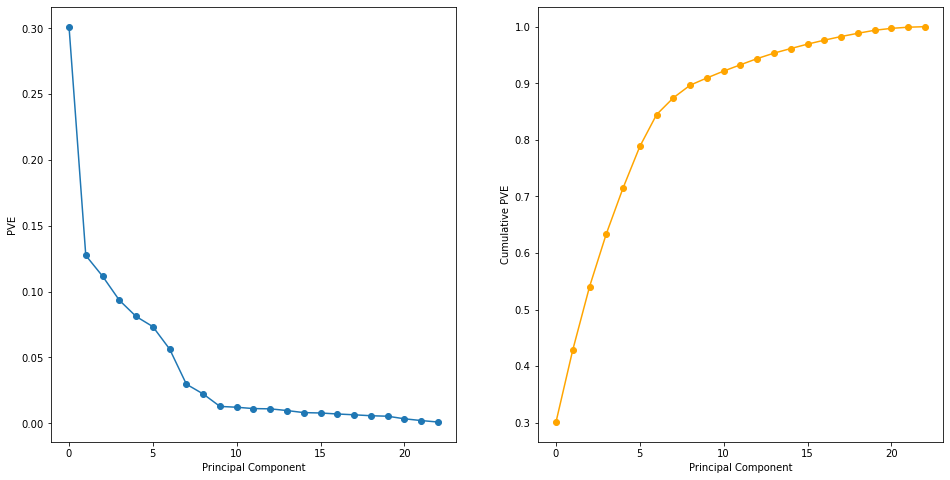

In [101]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

* We will take 10 components for PCA

In [102]:
#scale only numeric
scalednum_clf = make_pipeline(PCA(n_components=10), GaussianNB())
scalednum_clf.fit(X_train, y_train)
pred_test = scalednum_clf.predict(X_test)

print(f'Prediction accuracy: {metrics.accuracy_score(y_test, pred_test):.2%}')

Prediction accuracy: 45.97%


In [103]:
#The chosen factors should explain 80% of variance at least.

pca = scalednum_clf.named_steps['pca']
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.30124696 0.1274715  0.11171866 0.0934513  0.08111429 0.07338578
 0.05632607 0.02964901 0.02224688 0.01279229]
0.9094027454064519


In [104]:
#Feature importance for GAUSSIAN NAIVE BAYES

from sklearn.inspection import permutation_importance

feat_imp = permutation_importance(scalednum_clf, X_test, y_test)
print(feat_imp.importances_mean)

[ 2.40433333e-02  7.05800000e-02  4.16666667e-03  6.29300000e-02
  1.13600000e-02  3.07666667e-03  2.89600000e-02  1.26800000e-02
 -1.60666667e-03 -4.66666667e-05 -1.83333333e-04 -3.33333333e-05
 -5.33333333e-05 -4.66666667e-05  8.00000000e-05 -3.83333333e-04
  6.66666667e-06  4.00000000e-05 -7.00000000e-05  2.66666667e-05
  1.40666667e-03 -1.18000000e-03 -1.86666667e-04]


* Create new dataframe `importances_per_feat` which contains in the first column the name of each feature and in the second column the feature's importance according to Gaussian Naive Bayes.

In [105]:
importances_per_feat = pd.DataFrame()
importances_per_feat['features'] = spotmix2.columns[0:23]
importances_per_feat['coefficients'] = feat_imp.importances_mean
importances_per_feat

,features,coefficients
0,acousticness,0.024043
1,danceability,0.070580
2,duration_ms,0.004167
3,energy,0.062930
4,instrumentalness,0.011360
5,liveness,0.003077
6,loudness,0.028960
7,speechiness,0.012680
8,tempo,-0.001607
9,key_1,-0.000047


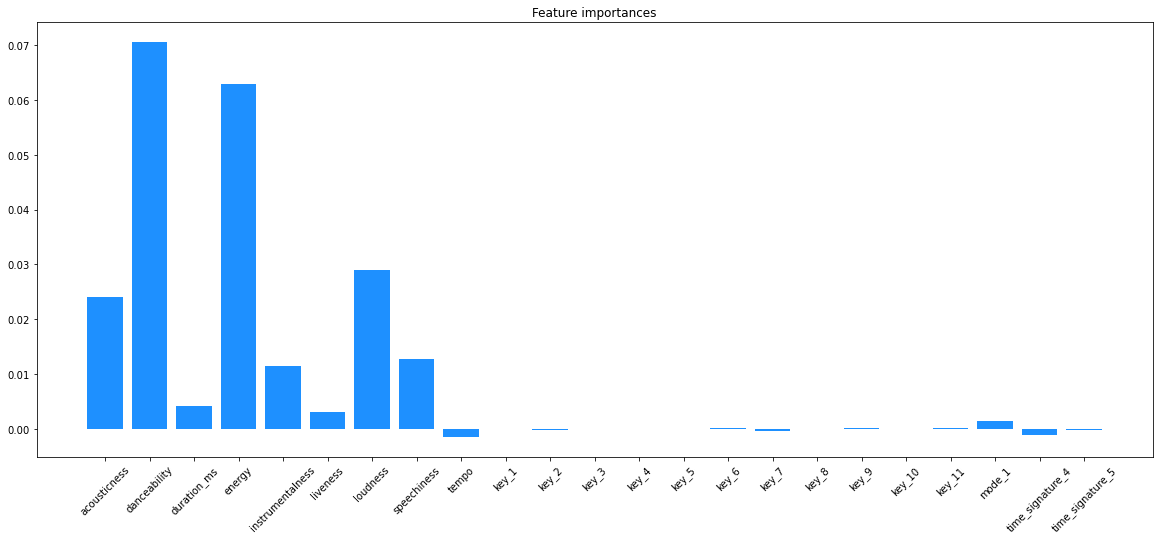

In [106]:
# Plot the feature importances of the forest
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importances_per_feat['features'], importances_per_feat['coefficients'], color = 'dodgerblue', align="center")
_ = plt.xticks(rotation=45)

From the above table, we can observe that the feature which influences positively `valence` the most is `danceability`, with `energy` and `loudness` coming in the second and the third place respectively. Furthermore, features like  `accousticness`,`instrumentalness`, `speechiness`, `duration_ms`, `livenss` and `mode` are influencing the `valence` to a lesser extend. We should mention that features `tempo` and `time_signature` influence negatively the score of `valence`. To the contrary, the feature `key` seem to not influence the `valence` at all.

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64     18336
           2       0.39      0.30      0.34     17207
           3       0.35      0.37      0.36     14839
           4       0.40      0.54      0.46      9618

    accuracy                           0.46     60000
   macro avg       0.45      0.46      0.45     60000
weighted avg       0.46      0.46      0.46     60000



In [108]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, pred_test))

Confusion matrix:
[[11756  3470  2346   764]
 [ 4334  5105  5267  2501]
 [ 1597  3300  5547  4395]
 [  654  1179  2613  5172]]


# 2nd Method: Stochastic Gradient Descent
Stochastic Gradient Descent is sensitive to the scales of the features. In order to tackle this problem we will use the dataset `spotmix2` which was scaled before.

In [109]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.001, max_iter=1000, tol=-np.inf, random_state=34, n_jobs=-1)
sgd_clf.fit(X_train, y_train) 
# X_train and y_train are already scaled from the previous method (Gaussian Naive Bayes)

SGDClassifier(alpha=0.001, n_jobs=-1, random_state=34, tol=-inf)

In [110]:
sgd_predict = sgd_clf.predict(X_test)

In [111]:
print(metrics.classification_report(y_test, sgd_predict))

              precision    recall  f1-score   support

           1       0.52      0.83      0.64     18336
           2       0.33      0.13      0.18     17207
           3       0.36      0.37      0.37     14839
           4       0.45      0.42      0.44      9618

    accuracy                           0.45     60000
   macro avg       0.42      0.44      0.41     60000
weighted avg       0.42      0.45      0.41     60000



* With the Stochastic Gradient Descent we get a lower accuracy than with the Gaussian Naive Bayes method. So, this is not the optimal one.

In [112]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, sgd_predict))

Confusion matrix:
[[15255   840  1568   673]
 [ 8804  2199  4745  1459]
 [ 3959  2587  5505  2788]
 [ 1187  1080  3296  4055]]


# 3rd Method ML: Decision Tree Classification

* Decision trees do not require feature scaling to be performed as they are not sensitive to the the variance in the data. So, we have to return back on our pre-scaled data set `spotmix`.

In [113]:
#create a copy of the original dataset and categorize the valence
import copy

category = pd.cut(spotmix.valence, bins=[0, 0.25, 0.5, 0.75, 1], include_lowest=True,labels=[1, 2, 3, 4])
category

spotmix3 = copy.deepcopy(spotmix)
spotmix3.drop(labels ='valence', axis = 1)
spotmix3['valence'] = category
spotmix3

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,0.61100,0.389,99373.0,0.910,0.00000,0.3460,-1.828,0.0525,166.969,4,...,0,0,0,0,0,0,0,1,1,0
1,0.24600,0.590,137373.0,0.737,0.00000,0.1510,-5.559,0.0868,174.003,4,...,0,1,0,0,0,0,0,0,1,0
2,0.95200,0.663,170267.0,0.131,0.00000,0.1030,-13.879,0.0362,99.488,2,...,0,0,0,0,0,0,0,0,0,1
3,0.70300,0.240,152427.0,0.326,0.00000,0.0985,-12.178,0.0395,171.758,1,...,0,0,0,0,0,0,0,1,1,0
4,0.95000,0.331,82625.0,0.225,0.12300,0.2020,-21.150,0.0456,140.576,2,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.00935,0.264,276213.0,0.966,0.00224,0.3370,-6.970,0.0672,159.586,2,...,1,0,0,0,0,0,0,0,1,0
1204021,0.10400,0.796,363179.0,0.701,0.64400,0.0749,-6.602,0.0883,121.980,4,...,0,0,0,0,0,0,1,0,1,0
1204022,0.03040,0.785,385335.0,0.796,0.91800,0.0664,-5.960,0.0564,121.996,2,...,0,0,0,0,1,0,0,0,1,0
1204023,0.00007,0.665,324455.0,0.856,0.77600,0.1170,-6.788,0.0409,124.986,1,...,0,1,0,0,0,0,0,0,1,0


* Again we will take a random sample size of 200K of our dataset for computational and performance reasons.

In [114]:
spotmix3 = spotmix3.sample(n = 200000, random_state=34)

In [115]:
#we will put valence column in last place
last = spotmix3.pop('valence')
spotmix3['valence'] = last
spotmix3

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
130297,0.872000,0.511,68387.0,0.08700,0.009580,0.1310,-18.202,0.0408,100.053,0,...,0,0,0,0,0,0,1,1,0,4
190437,0.028300,0.795,242493.0,0.50200,0.018500,0.0867,-6.878,0.0311,112.248,0,...,0,0,0,0,0,0,0,1,0,3
563191,0.686000,0.826,161973.0,0.56300,0.000000,0.3610,-8.346,0.0808,120.913,0,...,1,0,0,0,0,0,1,1,0,3
14973,0.452000,0.584,185744.0,0.71800,0.000024,0.2050,-10.985,0.0434,110.046,0,...,0,0,0,0,1,0,1,1,0,4
1072583,0.961000,0.142,463587.0,0.00129,0.008800,0.1490,-28.259,0.0555,69.448,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130007,0.974000,0.339,601573.0,0.12600,0.009780,0.2380,-18.967,0.0461,86.885,0,...,0,0,0,0,0,0,1,0,0,1
42529,0.000037,0.352,559187.0,0.83100,0.850000,0.1350,-7.139,0.0419,119.833,0,...,0,0,0,0,0,1,0,1,0,2
138259,0.004280,0.481,248627.0,0.72200,0.000040,0.0789,-4.496,0.0625,144.083,0,...,0,1,0,0,0,0,0,1,0,2
128956,0.000017,0.447,190313.0,0.92700,0.684000,0.1290,-5.156,0.0306,160.014,0,...,0,0,0,0,0,0,0,1,0,4


In [116]:
# We shufle our data
spotmix3 = spotmix3.sample(frac=1, random_state=34)
spotmix3

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
961946,0.692000,0.392,202053.0,0.3110,0.000000,0.1440,-10.260,0.0332,85.750,0,...,0,1,0,0,0,0,0,1,0,1
128096,0.973000,0.167,373747.0,0.0407,0.454000,0.1390,-25.518,0.0439,66.195,0,...,0,0,0,1,0,0,1,0,0,1
34208,0.002340,0.544,157946.0,0.8710,0.684000,0.0356,-8.057,0.0533,132.454,1,...,0,0,0,0,0,0,1,1,0,4
1105804,0.000427,0.722,219481.0,0.6610,0.000000,0.1180,-12.043,0.2820,139.997,1,...,0,0,0,0,0,0,1,1,0,1
117810,0.058100,0.407,244227.0,0.5310,0.000000,0.1100,-11.182,0.0324,79.985,0,...,0,0,0,1,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139761,0.055900,0.491,213773.0,0.7640,0.719000,0.1020,-7.841,0.0329,118.282,0,...,0,1,0,0,0,0,0,1,0,2
216387,0.724000,0.416,338160.0,0.2590,0.000000,0.8440,-18.621,0.0578,114.330,0,...,0,0,1,0,0,0,1,0,0,2
853077,0.995000,0.430,67360.0,0.1420,0.918000,0.1040,-23.691,0.0576,153.336,0,...,0,0,0,0,1,0,1,0,0,2
1035937,0.000031,0.252,495000.0,0.9550,0.000648,0.8650,-5.060,0.0731,139.835,1,...,0,0,0,0,0,0,0,1,0,1


In [117]:
from sklearn.model_selection import train_test_split

#Split in train and test dataset 70/30
X3_train, X3_test, y3_train, y3_test = train_test_split(spotmix3.iloc[:,0:23], spotmix3.valence, 
                                                    test_size=0.20, random_state=42)

* To begin with, we will instantiate and fit a `DecisionTreeClassifier`.

In [118]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X3_train, y3_train)
gini_predict = clf_gini.predict(X3_test)

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y3_test, gini_predict))

              precision    recall  f1-score   support

           1       0.60      0.59      0.59     12191
           2       0.37      0.37      0.37     11373
           3       0.35      0.35      0.35     10062
           4       0.38      0.38      0.38      6374

    accuracy                           0.43     40000
   macro avg       0.42      0.42      0.42     40000
weighted avg       0.44      0.43      0.44     40000



In [120]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y3_test, gini_predict))

Confusion matrix:
[[7145 3084 1448  514]
 [2909 4258 2963 1243]
 [1380 2951 3545 2186]
 [ 553 1219 2161 2441]]


### We will try to improve our decision tree by implementing the Bagging technique.

In [121]:
from sklearn.model_selection import cross_val_score

from scipy.stats import sem

feature_cols = [ col for col in X3_train.columns if col != 'valence' ]

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

spotify_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini'),
                                       n_estimators=100, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(spotify_tree, 
                                  X3_train, 
                                  y3_train, 
                                  cv=3, scoring='accuracy')

print(np.mean(bagged_cv_score), sem(bagged_cv_score))

0.5205937462906945 0.0002998871167700855


In [123]:
spotify_tree.fit(X3_train, y3_train)
bag_predict = spotify_tree.predict(X3_test)

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y3_test, bag_predict))

              precision    recall  f1-score   support

           1       0.70      0.68      0.69     12191
           2       0.43      0.45      0.44     11373
           3       0.42      0.45      0.44     10062
           4       0.54      0.46      0.50      6374

    accuracy                           0.52     40000
   macro avg       0.52      0.51      0.52     40000
weighted avg       0.53      0.52      0.52     40000



In [125]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y3_test, bag_predict))

Confusion matrix:
[[8328 2754  896  213]
 [2697 5117 2923  636]
 [ 750 3101 4541 1670]
 [ 186  854 2405 2929]]


* We can observe that we have better accuracy with the use of bagging technique.

In order to calculate the feature importances, we took the average of `tree.feature_importances_` among all trees in `spotify_tree.estimators_`

In [126]:
#Feature Importances

feature_importances_bag = np.mean([tree.feature_importances_ for tree in spotify_tree.estimators_], axis=0)

importances_per_feat_tree = pd.DataFrame()
importances_per_feat_tree['features'] = spotmix3.columns[0:23]
importances_per_feat_tree['coefficients'] = feature_importances_bag
importances_per_feat_tree

,features,coefficients
0,acousticness,0.087575
1,danceability,0.189939
2,duration_ms,0.095483
3,energy,0.125473
4,instrumentalness,0.071415
5,liveness,0.082096
6,loudness,0.084656
7,speechiness,0.089878
8,tempo,0.088075
9,key_1,0.006711


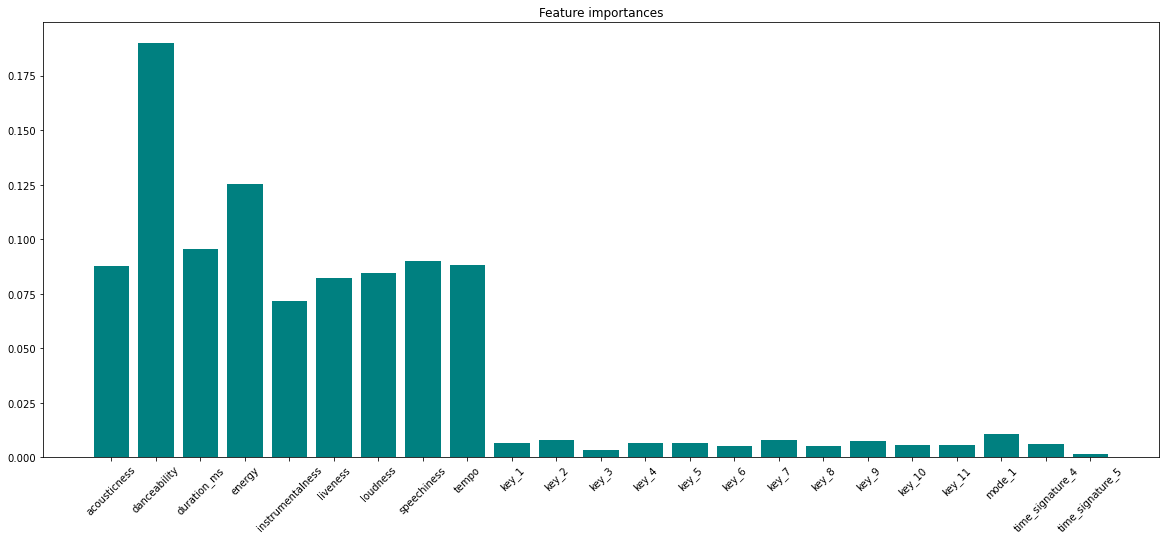

In [127]:
# Plot the feature importances of the decision tree classifier (with bagging)
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importances_per_feat_tree['features'], importances_per_feat_tree['coefficients'], color = 'teal', align="center")
_ = plt.xticks(rotation=45)

From the above graph we can see that variable `danceability` is the most important, with `energy`, `duration_ms`, `speechiness`, `acousticness`, `tempo`, `loudness`, `liveness` and `instumentalness` following. The levels of our categorical variables `key`, `mode` and `time_signature` seem to be less important than the numeric variables.

## 4th Method: Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores = cross_val_score(forest, X3_train, 
                         y3_train, cv=5)
scores.mean()               

0.52333125

In [129]:
forest.fit(X3_train, y3_train)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X3_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_cols[indices[f]], importances[indices[f]]))

1. feature 1 danceability (0.152851)
2. feature 3 energy (0.122131)
3. feature 6 loudness (0.098555)
4. feature 2 duration_ms (0.096607)
5. feature 0 acousticness (0.094212)
6. feature 7 speechiness (0.089935)
7. feature 8 tempo (0.087971)
8. feature 5 liveness (0.083416)
9. feature 4 instrumentalness (0.078506)
10. feature 20 mode_1 (0.011476)
11. feature 15 key_7 (0.009142)
12. feature 10 key_2 (0.008780)
13. feature 17 key_9 (0.008147)
14. feature 21 time_signature_4 (0.007858)
15. feature 13 key_5 (0.007147)
16. feature 12 key_4 (0.006993)
17. feature 9 key_1 (0.006585)
18. feature 19 key_11 (0.006447)
19. feature 18 key_10 (0.006138)
20. feature 16 key_8 (0.005812)
21. feature 14 key_6 (0.005732)
22. feature 11 key_3 (0.003657)
23. feature 22 time_signature_5 (0.001903)


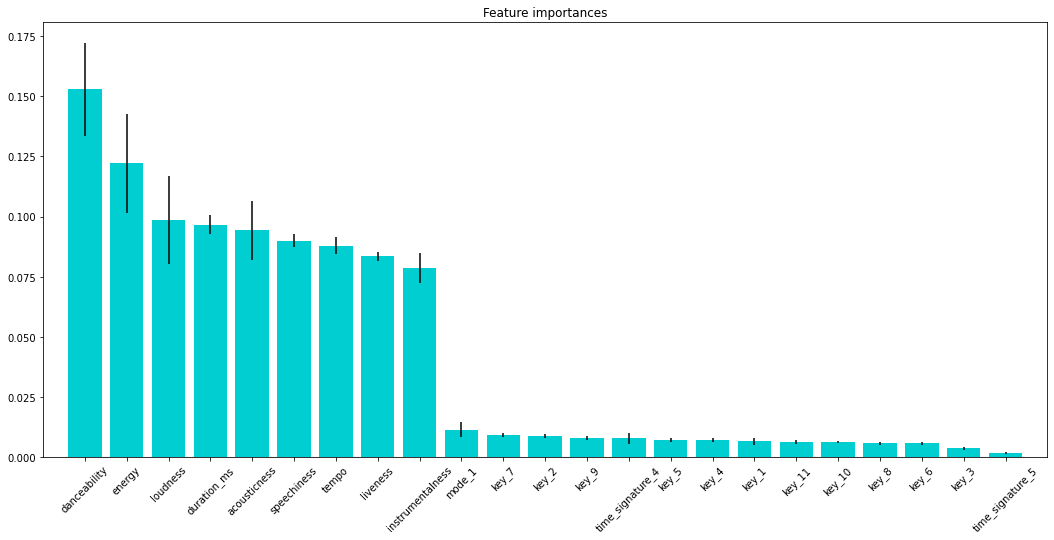

In [130]:
# Plot the feature importances of the forest
plt.figure(figsize=(18, 8))
plt.title("Feature importances")
plt.bar(range(X3_train.shape[1]), importances[indices],
        tick_label=[feature_cols[x] for x in indices],
        color="darkturquoise", yerr=std[indices], align="center")
plt.xlim([-1, X3_train.shape[1]])
_ = plt.xticks(rotation=45)

From the above graph we can see that variable `danceability` is the most important, with `energy`, `duration_ms`, `loudness`, `acousticness`, `speechiness`, `tempo`, `liveness` and `instumentalness` following. The levels of our categorical variables `key`, `mode` and `time_signature` seem to be less important than the numeric variables.

In [131]:
forest_predict = forest.predict(X3_test)

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y3_test, forest_predict))

              precision    recall  f1-score   support

           1       0.69      0.69      0.69     12191
           2       0.44      0.46      0.45     11373
           3       0.42      0.45      0.44     10062
           4       0.55      0.44      0.49      6374

    accuracy                           0.52     40000
   macro avg       0.52      0.51      0.52     40000
weighted avg       0.53      0.52      0.53     40000



In [133]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y3_test, forest_predict))

Confusion matrix:
[[8442 2718  846  185]
 [2754 5215 2861  543]
 [ 804 3157 4535 1566]
 [ 209  843 2519 2803]]


We get slightly better results with random forest compared to decision tree with bagging.

## 5th Method: Regression Decision Tree
In this section we will implement the method of the regression decision tree.

* In this section we will return to the `spotmix` dataset. Here, we will have `valence` in contious form [0,1] and not the categorized version of it, which we created for the implementation of the previous methods. As, the size of the `spotmix` dataset is quite high, we will take a random sample size of 200K of our dataset in order to tackle some computational and performance issues. 

In [134]:
spotmix4 = spotmix.sample(n = 200000, random_state=30)

In [135]:
#We will put valence column in last place
last1 = spotmix4.pop('valence')
spotmix4['valence'] = last1
spotmix4

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
918235,0.2510,0.436,62124.0,0.3250,0.877000,0.118,-13.698,0.0455,172.010,0,...,0,1,0,0,0,0,1,1,0,0.0359
63017,0.0713,0.613,405800.0,0.9250,0.034900,0.410,-9.162,0.0603,122.018,0,...,0,0,0,0,0,0,1,1,0,0.9310
703379,0.3660,0.359,176007.0,0.6430,0.000111,0.104,-5.429,0.1870,97.276,0,...,0,0,0,0,1,0,1,1,0,0.1980
72470,0.9040,0.645,107933.0,0.3070,0.000000,0.138,-8.081,0.0571,77.434,0,...,0,1,0,0,0,0,1,1,0,0.9140
1053860,0.8510,0.414,65667.0,0.5450,0.000000,0.490,-16.884,0.8000,111.478,0,...,0,0,0,0,0,0,0,1,0,0.1770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316204,0.4510,0.443,402333.0,0.4470,0.000000,0.964,-8.689,0.0276,139.920,0,...,0,0,0,0,0,0,1,0,0,0.2400
1174954,0.1150,0.899,221543.0,0.5570,0.000000,0.247,-8.677,0.2520,97.538,0,...,1,0,0,0,0,0,1,1,0,0.5860
47080,0.9480,0.389,183293.0,0.4390,0.001430,0.188,-7.539,0.0379,70.849,0,...,0,0,0,0,1,0,1,1,0,0.5870
521869,0.9940,0.288,976587.0,0.0779,0.862000,0.253,-22.140,0.0495,87.948,0,...,0,0,0,0,0,0,1,1,0,0.0392


In [136]:
from sklearn.model_selection import train_test_split

#Split in train and test dataset 80/20
X4_train, X4_test, y4_train, y4_test = train_test_split(spotmix4.iloc[:,0:23], spotmix4.valence, 
                                                    test_size=0.20, random_state=333)

* Continuing, we have to search for the ideal `max_depth` of the tree. In order to take a first insight on that we will try different `max_depth` values, as well as we will run k-fold validation to get the scores.

In [137]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from scipy.stats import sem

all_depths = []
all_mean_scores = []

for max_depth in range(1, 15):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=19)
    scores = cross_val_score(simple_tree, X4_train, y4_train, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.22180015 0.2256855  0.21672151 0.21657692 0.22883967] 0.221924751457263 0.0024253650090707134
max_depth =  2 [0.29782386 0.30429167 0.29622136 0.29858701 0.3034397 ] 0.3000727195715086 0.0016005272317738677
max_depth =  3 [0.34818812 0.3554786  0.34675347 0.35199885 0.35453561] 0.35139092867429855 0.0017136458212961682
max_depth =  4 [0.37630618 0.38461355 0.37718858 0.3793746  0.37944862] 0.379386304945705 0.0014430046185966309
max_depth =  5 [0.3978717  0.4049665  0.40004231 0.39882275 0.40313953] 0.4009685592265878 0.001336967254166118
max_depth =  6 [0.41598277 0.42208064 0.41940701 0.41737152 0.41904165] 0.4187767196167478 0.0010286902064984772
max_depth =  7 [0.43005548 0.43435885 0.43148557 0.43266603 0.43494018] 0.43270122182248744 0.0009011011996094355
max_depth =  8 [0.43881476 0.44785876 0.43896521 0.44450329 0.44440962] 0.4429103260223594 0.0017551347874725446
max_depth =  9 [0.44309712 0.45445329 0.4453206  0.45157785 0.44889845] 0.4486694622150284 0.0020

Text(0, 0.5, 'mean score')

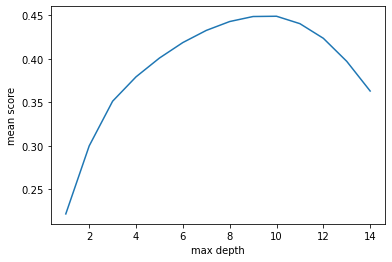

In [138]:
plt.plot(all_depths, all_mean_scores, label='True y')
plt.xlabel('max depth')
plt.ylabel('mean score')

* So, as we can see the best result is at `max_depth` = 10.

In [139]:
# We fit the model.
regr_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)
regr_tree.fit(X4_train, y4_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)

* Then we will create a new dataframe `importances_regr_tree` which will contain in the first column the name of each feature and in the second column the feature's importance according to Decision Tree Regressor.

In [140]:
#Feature Importances
importances_regr_tree = pd.DataFrame()
importances_regr_tree['features'] = spotmix4.columns[0:23]
importances_regr_tree['coefficients'] = regr_tree.feature_importances_
importances_regr_tree

,features,coefficients
0,acousticness,0.035371
1,danceability,0.571319
2,duration_ms,0.063782
3,energy,0.216655
4,instrumentalness,0.020771
5,liveness,0.015239
6,loudness,0.012618
7,speechiness,0.035158
8,tempo,0.026020
9,key_1,0.000604


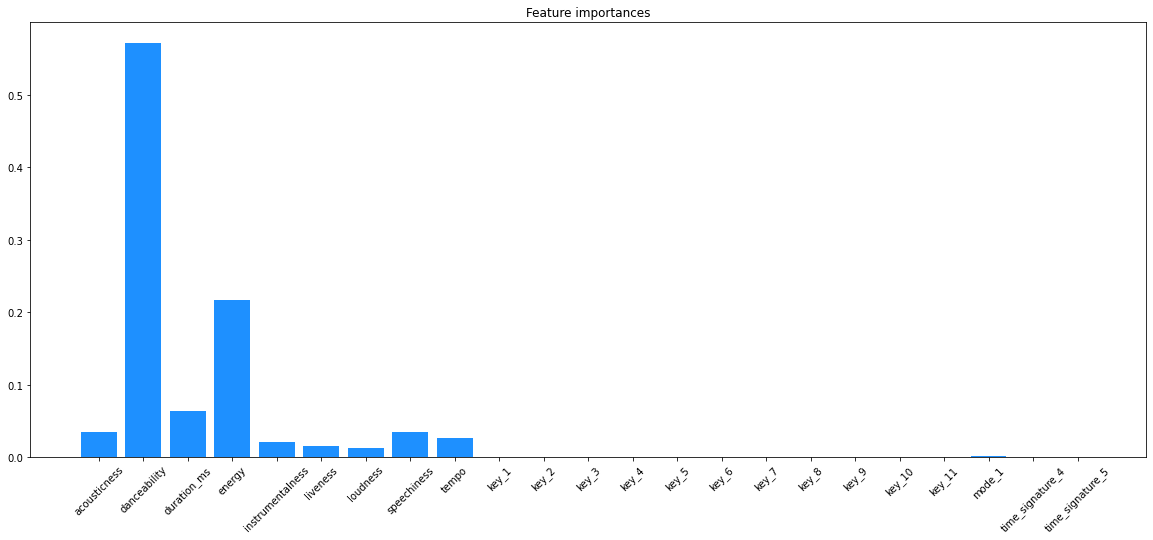

In [141]:
# Plot the feature importances of the regression decision tree 
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importances_regr_tree['features'], importances_regr_tree['coefficients'], color = 'dodgerblue', align="center")
_ = plt.xticks(rotation=45)

From the above table, we can observe that the feature which influences positively `valence` the most is `danceability`, with `energy` coming in the second place. Furthermore, features like `duration_ms`, `speechiness`, `accousticness`, `tempo`, `instrumentalness`,  `liveness` and `loudness` are influencing the `valence` to a lesser extend. To the contrary, the features like `key`, `mode` and `time_signature` seem to not influence the `valence` at all.

* We will evaluate the predictive performance of this method, by calculating the Mean Absolute Error using the dataset that we split by ourselves (e.g., `X4_test`, `y4_test`) and NOT the one that has been provided to us.

In [142]:
from sklearn.metrics import mean_absolute_error as mae

y4_pred  = regr_tree.predict(X4_test) 

print(mae(y4_test, y4_pred))

0.15548836198152938


## 6th Method: Gradient Boosting Regressor
In this section we will implement the method of the gradient boosting regressor. This will be the method that will be evaluated by the test dataset provided by the course, as from previous tests we found out to achive the best predictions among the other methods.
* According to wikipedia, gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

* In order to implement this method, we will return to the `spotmix4` dataset created in the previous method, which is a random sample size of 200K of the main `spotmix` dataset, which has variable `valence` in contious form [0,1] and not the categorized version of it.

In [143]:
from sklearn.model_selection import train_test_split

#Split spotmix4 in train and test dataset 80/20
X5_train, X5_test, y5_train, y5_test = train_test_split(spotmix4.iloc[:,0:23], spotmix4.valence, 
                                                    test_size=0.20, random_state=34)

In [144]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

reg = GradientBoostingRegressor(n_estimators=100,
                                max_depth=10,
                                learning_rate=0.1,
                                min_samples_split=3)
reg.fit(X5_train, y5_train)

GradientBoostingRegressor(max_depth=10, min_samples_split=3)

* Then we will create a new dataframe `importances_boost` which will contain in the first column the name of each feature and in the second column the feature's importance according to Gradient Boosting Regressor.

In [145]:
#Feature Importances
importances_boost = pd.DataFrame()
importances_boost['features'] = spotmix4.columns[0:23]
importances_boost['coefficients'] = reg.feature_importances_
importances_boost

,features,coefficients
0,acousticness,0.054897
1,danceability,0.432874
2,duration_ms,0.072048
3,energy,0.183474
4,instrumentalness,0.039811
5,liveness,0.036905
6,loudness,0.043359
7,speechiness,0.059119
8,tempo,0.057356
9,key_1,0.002650


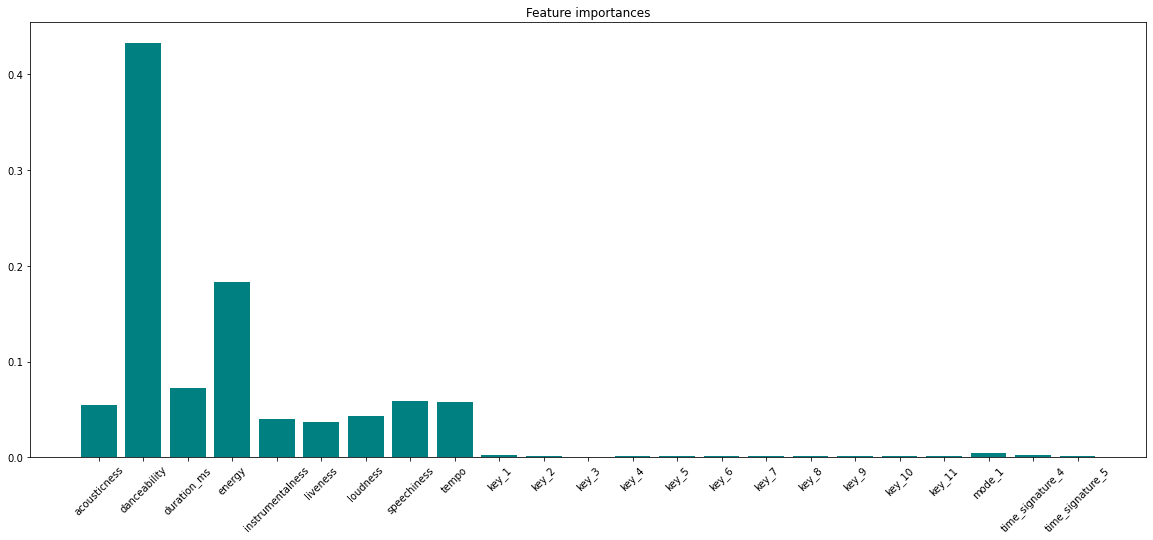

In [146]:
# Plot the feature importances of the regression decision tree 
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importances_boost['features'], importances_boost['coefficients'], color = 'teal', align="center")
_ = plt.xticks(rotation=45)

From the above table, we can observe that the feature which influences positively `valence` the most is `danceability`, with `energy` coming in the second place. Furthermore, features like `duration_ms`, `speechiness`, `accousticness`, `tempo`, `loudness`, `instrumentalness` and `liveness` are influencing the `valence` to a lesser extend. To the contrary, the features like `key`, `mode` and `time_signature` seem to not influence the `valence` at all.

* We will evaluate the predictive performance of this method, by calculating the Mean Absolute Error using the dataset that we split by ourselves (e.g., `X5_test`, `y5_test`) and NOT the one that has been provided to us.

In [147]:
y5_pred  = reg.predict(X5_test) 

print(mae(y5_test, y5_pred))

0.1410246652525782


* As we can see, this is the best method among the others. So, we will revaluate the predictive performance of this method by calculating the Mean Absolute Error using the test dataset that has been provided to us.

# Validation
* We will validate the predictive performance of our model with the test dataset provided to us.

In [148]:
#RANKING for Gradient Boosting Regressor
from sklearn.metrics import mean_absolute_error as mae

final_pred  = reg.predict(tracks.iloc[:,0:23]) 

print(mae(tracks.valence, final_pred))
# MAE = 0.151

0.15120205435838854
